# Исследование рынка заведений общественного питания в Москве

## Описание проекта

Необходимо исследовать рынок заведений общественного питания в Москве для открытия нового кафе. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке. 
У нас есть открытые данные о заведениях общественного питания в Москве.


### Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import re

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В датафрейме rest_data содержится информация о заведениях общественного питания Москвы:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Для удобства приведем данные в датафрейме к единому регистру:

In [5]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

Проверим данные на дубликаты. Дубликатами будем считать строки, где повторяются данные во всех столбцах, кроме id:

In [6]:
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

85

Всего таких нашлось 85. Избавимся от этих дубликатов:

In [7]:
rest_data = rest_data.drop_duplicates(['object_name', 'chain', 'object_type', 'address', 'number'])
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

0

От дубликатов избавились. Посмотрим на данные:
    

In [8]:
rest_data.groupby('chain')['id'].count()

chain
да      2964
нет    12317
Name: id, dtype: int64

Несетевых заведений в несколько раз больше: сетевых 2964, несетевых 12317.

In [9]:
rest_data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [10]:
rest_data.sort_values(by = 'number', ascending = False).head()

,id,object_name,chain,object_type,address,number
12723,199696,arena by soho family,нет,бар,"город москва, кутузовский проспект, дом 36, ст...",1700
8148,80291,банкетный зал шелк,нет,ресторан,"город москва, большой саввинский переулок, дом...",1500
8345,27750,столовая-буфет,нет,столовая,"город москва, улица волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,нет,столовая,"город москва, проспект вернадского, дом 84, ст...",1288
4480,27024,рум сервис,нет,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200


Самое большое место вмещает в себя 1700 посадочных мест, а в среднем - 59.

In [11]:
rest_data.groupby('object_type')['id'].count().sort_values(ascending = False)

object_type
кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: id, dtype: int64

Больше всего - кафе. Их тут 6071. На последнем месте по количеству заведений - отдел кулинарии в магазине - 273.

In [12]:
rest_data[rest_data['chain'] == 'да'].groupby('object_name')['id'].count().sort_values(ascending = False).head(5)

object_name
шоколадница    157
kfc            155
макдоналдс     150
бургер кинг    137
теремок         94
Name: id, dtype: int64

Из сетевых заведений больше всего точек у Шоколадницы. Также в топе с небольшим отрывом KFC, Макдоналдс, Бургер Кинг и замыкает пятерку лидеров Теремок.

#### Вывод

Провели предварительный анализ данных: 
- На первом месте по количеству заведений - Шоколадница, также в топ-5 входят KFC, Макдоналдс, Бургер Кинг и замыкает пятерку лидеров Теремок.
- По типу заведений на первом месте - кафе, в тройке лидеров также столовые и рестораны. На последнем месте - отделы кулинарии в магазине 
- Несетевых заведений гораздо меньше, чем сетевых: 12317 и 2964 соответственно 
- В среднем в заведениях около 59 посадочных мест. Максимальное количество - 1700 - в баре Arena by soho family.

### Анализ данных

In [13]:
def pie_chart(df, column, column_name, aggfunc, title):
    df.groupby(column).agg({column_name : aggfunc}).plot(kind = 'pie'
                                                              , y = 'id'
                                                              , figsize = (8, 10)
                                                              , autopct='%1.1f%%'
                                                              , legend = None
                                                              )
    plt.title(title)
    plt.ylabel(None);

#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

object_type
кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: id, dtype: int64

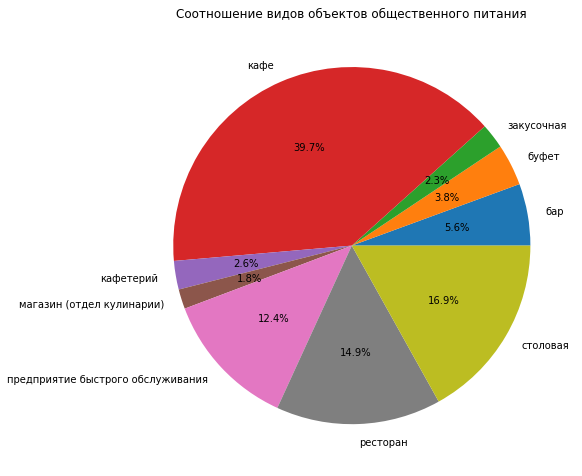

In [14]:
pie_chart(rest_data, 'object_type', 'id', 'count','Cоотношение видов объектов общественного питания' )
rest_data.groupby('object_type')['id'].count().sort_values(ascending = False)

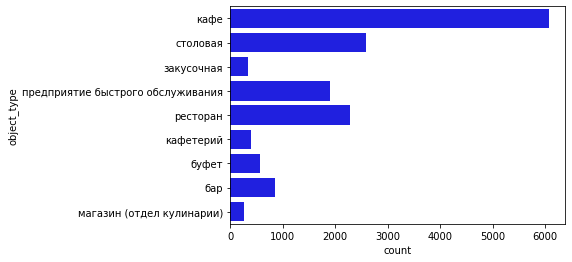

In [15]:
sns.countplot(y = "object_type",  data = rest_data, orient = 'h', color = 'blue');

С большим отрывом по количеству идут кафе - их 6071, что составляет 39.7%. Практически наравне - столовые (2584, 16.9%) и рестораны (2282, 14.9%). <br>
На последнем месте - отдел кулинарии в магазине (273, 1.8%).

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

,id
chain,
да,2964
нет,12317


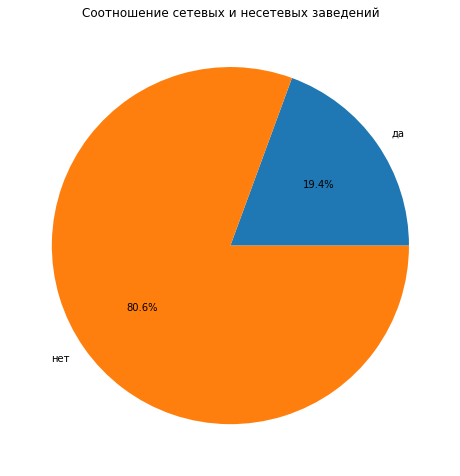

In [16]:
pie_chart(rest_data, 'chain', 'id', 'nunique', 'Соотношение сетевых и несетевых заведений')
rest_data.groupby('chain').agg({'id' : 'nunique'})

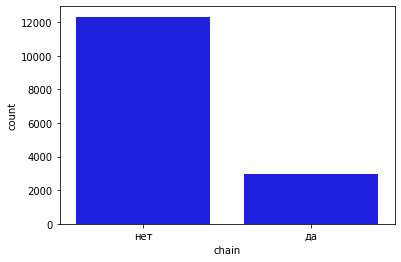

In [17]:
sns.countplot(x = "chain",  data = rest_data, color = 'blue');

Как видим, несетевых  заведений гораздо больше: <br>
    Несетевых заведений 12317, что составляет 80.6% от общего числа заведений общественного питания. 

#### Для какого вида объекта общественного питания характерно сетевое распространение?

Выделим информацию о сетевым заведениях в отдельный датафрейм:

In [18]:
chain_yes =  rest_data[rest_data['chain'] == 'да'].reset_index()

In [19]:
chain_yes.groupby('object_type')['id'].count().sort_values(ascending = False)

object_type
кафе                                 1396
предприятие быстрого обслуживания     788
ресторан                              543
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: id, dtype: int64

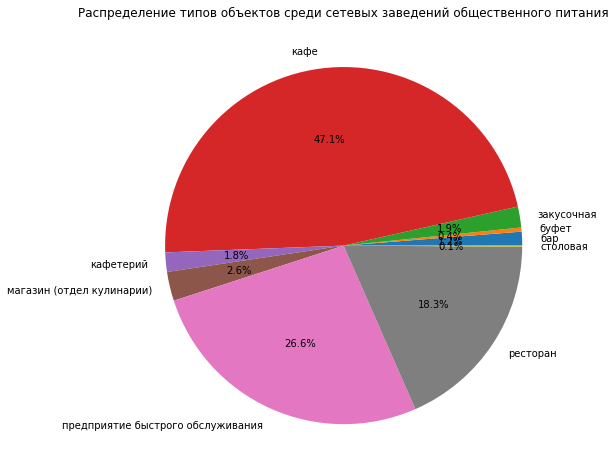

In [20]:
pie_chart(chain_yes, 'object_type', 'id', 'count', 'Распределение типов объектов среди сетевых заведений общественного питания')

Среди сетевых заведений больше всего кафе - 1396 (47.1%), предприятий быстрого обслуживания (788, 26.6%) и ресторанов (543, 18.3%)


Посмотрим, какие типы объектов чаще остальных становятся сетевыми: 

In [21]:
chain_pivot = rest_data.pivot_table(index = 'object_type'
                                    , columns = 'chain'
                                    , values = 'id'
                                    , aggfunc = 'count').reset_index()
chain_pivot

chain,object_type,да,нет
0,бар,37,818
1,буфет,11,565
2,закусочная,56,292
3,кафе,1396,4675
4,кафетерий,52,343
5,магазин (отдел кулинарии),78,195
6,предприятие быстрого обслуживания,788,1109
7,ресторан,543,1739
8,столовая,3,2581


Посчитаем общее количество заведений и процентное соотношение:

In [22]:
chain_pivot['sum'] =  chain_pivot['да'] + chain_pivot['нет']
chain_pivot['percent'] = (chain_pivot['да'] / chain_pivot['sum']) * 100

In [23]:
chain_pivot.sort_values(by = 'percent', ascending = False)

chain,object_type,да,нет,sum,percent
6,предприятие быстрого обслуживания,788,1109,1897,41.539273
5,магазин (отдел кулинарии),78,195,273,28.571429
7,ресторан,543,1739,2282,23.794917
3,кафе,1396,4675,6071,22.994564
2,закусочная,56,292,348,16.091954
4,кафетерий,52,343,395,13.164557
0,бар,37,818,855,4.327485
1,буфет,11,565,576,1.909722
8,столовая,3,2581,2584,0.116099


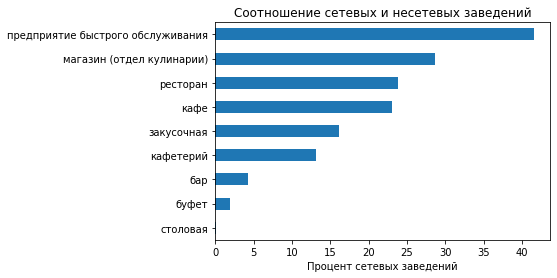

In [24]:
chain_pivot.sort_values(by = 'percent').plot(x = 'object_type', y = 'percent', kind = 'barh', legend = None)
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Процент сетевых заведений')
plt.ylabel(None);

Из расчетов следует, что предприятия быстрого обслуживания чаще остальных являются сетевыми: среди общего количества 41.5% являются сетевыми. <br>
    На втором месте - отделы кулинарии в магазинах (но это, скорее всего, связано с сетевым типом магазинов, здесь 28.5%)<br>
    На третьем же месте - рестораны с 23%. <br>
Реже остальных - столовые, там нет и 1% сетевого типа заведений: 0.11%. 

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [25]:
chain_yes_pivot = chain_yes.groupby('object_name').agg({'id' : 'nunique'
                                                        , 'number' : 'median'}
                                                      ).sort_values(by = 'id')
chain_yes_pivot

,id,number
object_name,,
beverly hills diner,1,88.0
мимино хинкальная,1,70.0
милано пицца,1,20.0
метро к&к,1,80.0
меленка,1,20.0
...,...,...
теремок,94,23.0
бургер кинг,137,45.0
макдоналдс,150,77.5


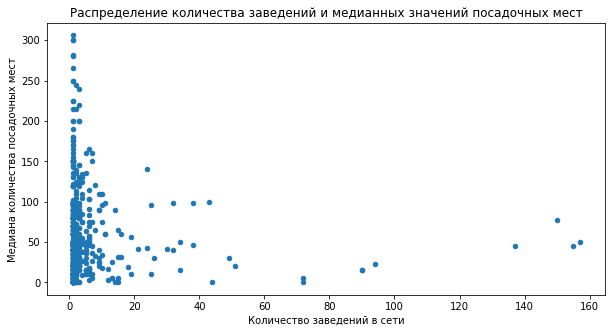

In [26]:
chain_yes_pivot.plot(y = 'number', x = 'id', kind = 'scatter', figsize = (10                                                                          ,5))
plt.title('Распределение количества заведений и медианных значений посадочных мест')
plt.xlabel('Количество заведений в сети')
plt.ylabel('Медиана количества посадочных мест');

In [27]:
print('Перцентили по количеству посадочных мест:', np.percentile(chain_yes['number'], [90, 95, 99])) 
print('Перцентили по количеству точек:', np.percentile(chain_yes_pivot['id'], [90, 95, 99])) 

Перцентили по количеству посадочных мест: [120.   158.85 275.37]
Перцентили по количеству точек: [ 8.4 16.4 90. ]


Как видим, в 90% сетей не более 120 посадочных мести и не более 8 заведений. То есть можно сделать вывод о том, что для сетевых заведений характерно небольшое количество заведений с большим количеством мест.

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

object_type
столовая                             130.337848
ресторан                              96.884750
буфет                                 51.425347
бар                                   43.533333
кафе                                  39.785703
предприятие быстрого обслуживания     20.808645
кафетерий                              9.184810
закусочная                             7.847701
магазин (отдел кулинарии)              5.589744
Name: number, dtype: float64

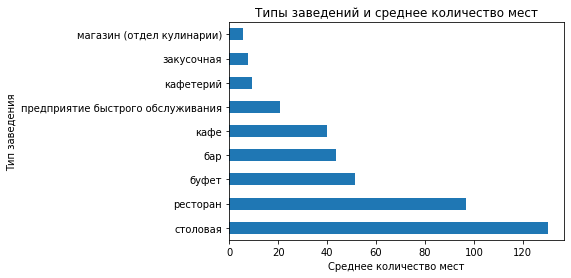

In [28]:
data = rest_data.groupby('object_type')['number'].mean().sort_values(ascending = False)
data.plot(kind = 'barh')
plt.title('Типы заведений и среднее количество мест')
plt.ylabel('Тип заведения')
plt.xlabel('Среднее количество мест');
data


Больше всего посадочных мест в столовых (в среднем - 130), далее идут рестораны (96 посадочных мест), на третьем - буфеты. Думаю, это связано с тем, за чем люди ходят в эти места: в столовые обычно ходят быстро и недорого пообедать, поэтому плотная расстановка столов в таких местах не будет смущать, а большое количество столов равно большое количество поситетелей. В ресторанах же люди проводят куда больше времени, поэтому расстановка там другая, но, в отличие, например, от кафе, залы там чаще всего гораздо больше по площади.  <br>
Меньше всего посадочных мест в отделах кулинарии в магазинах (их там в среднем около 5) - тут это скорее всего связано с тем, что тут люди берут еду либо с собой, либо для быстрого перекуса между покупками. Большое количество столиков тут не нужно.

####  Выделите в отдельный столбец информацию об улице из столбца address .

In [29]:
rest_data['address']

0               город москва, улица егора абакумова, дом 9
1        город москва, улица талалихина, дом 2/1, корпус 1
2                город москва, абельмановская улица, дом 6
3                  город москва, абрамцевская улица, дом 1
4        город москва, абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город москва, 3-й крутицкий переулок, дом 18
15362             город москва, улица земляной вал, дом 33
15363             город москва, улица земляной вал, дом 33
15364    город москва, поселение московский, киевское ш...
15365               город москва, ходынский бульвар, дом 4
Name: address, Length: 15281, dtype: object

In [30]:
street_types = ['улица', 'ул', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека', 'село']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(street_types))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


####  Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

,cnt_id
street,
проспект мира,203
профсоюзная улица,181
ленинградский проспект,170
пресненская набережная,167
варшавское шоссе,164
ленинский проспект,147
проспект вернадского,128
кутузовский проспект,114
каширское шоссе,111


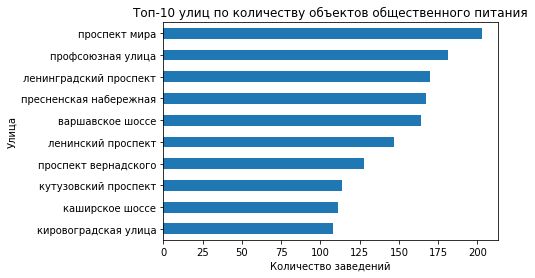

In [31]:
rest_streets = rest_data.groupby('street').agg({'id' : 'nunique'}).sort_values(by = 'id', ascending = False)
rest_streets = rest_streets.rename(columns = {'id' : 'cnt_id'})
rest_streets.head(10).sort_values(by = 'cnt_id').plot(kind = 'barh', legend = None)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Количество заведений')
plt.ylabel('Улица')
# plt.legend(None)
rest_streets.head(10)

Больше всего заведений общественного питания находится на Проспекте мира, также в тройке лидеров Профсоюзная улица и Ленинградский проспект.

Загрузим данные об улицах и районах Москвы:

In [32]:
from io import BytesIO 
import requests 
spreadsheet_id = '1GyKro_Zg5DOgVl42rMJKrH-6ra2Jcuayj4qTlcuM7JI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id) 
r = requests.get(file_name) 
districts = pd.read_csv(BytesIO(r.content)) 
districts 

# https://docs.google.com/spreadsheets/d/1GyKro_Zg5DOgVl42rMJKrH-6ra2Jcuayj4qTlcuM7JI/edit?usp=sharing


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [33]:
districts['streetname'] = districts['streetname'].str.lower()
districts

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


In [34]:
top_10_streets = rest_streets.head(10)
top_10_streets

,cnt_id
street,
проспект мира,203
профсоюзная улица,181
ленинградский проспект,170
пресненская набережная,167
варшавское шоссе,164
ленинский проспект,147
проспект вернадского,128
кутузовский проспект,114
каширское шоссе,111


In [35]:
districts_top = top_10_streets.merge(districts
                                     , left_on = 'street'
                                     , right_on = 'streetname')
districts_top

,cnt_id,streetname,areaid,okrug,area
0,203,проспект мира,70,СВАО,Алексеевский район
1,203,проспект мира,86,СВАО,Ярославский Район
2,203,проспект мира,78,СВАО,Район Марьина роща
3,203,проспект мира,79,СВАО,Останкинский район
4,203,проспект мира,81,СВАО,Район Ростокино
5,203,проспект мира,82,СВАО,Район Свиблово
6,203,проспект мира,16,ЦАО,Мещанский район
7,181,профсоюзная улица,123,ЮЗАО,Академический район
8,181,профсоюзная улица,132,ЮЗАО,Район Черемушки
9,181,профсоюзная улица,134,ЮЗАО,Район Ясенево


In [36]:
districts_top = districts_top[['streetname', 'area']]

In [37]:
districts_top

,streetname,area
0,проспект мира,Алексеевский район
1,проспект мира,Ярославский Район
2,проспект мира,Район Марьина роща
3,проспект мира,Останкинский район
4,проспект мира,Район Ростокино
5,проспект мира,Район Свиблово
6,проспект мира,Мещанский район
7,профсоюзная улица,Академический район
8,профсоюзная улица,Район Черемушки
9,профсоюзная улица,Район Ясенево


Список районов, в которых находятся эти улицы:

In [38]:
for area in districts_top['area'].sort_values().unique():
    print('-', area)

- Академический район
- Алексеевский район
- Донской район
- Ломоносовский район
- Мещанский район
- Нагорный район
- Обручевский район
- Останкинский район
- Пресненский район
- Район Аэропорт
- Район Беговой
- Район Гагаринский
- Район Дорогомилово
- Район Коньково
- Район Марьина роща
- Район Москворечье-Сабурово
- Район Нагатино-Садовники
- Район Орехово-Борисово Северное
- Район Орехово-Борисово Южное
- Район Проспект Вернадского
- Район Раменки
- Район Ростокино
- Район Свиблово
- Район Северное Бутово
- Район Сокол
- Район Теплый Стан
- Район Тропарево-Никулино
- Район Фили-Давыдково
- Район Черемушки
- Район Чертаново Северное
- Район Чертаново Центральное
- Район Чертаново Южное
- Район Южное Бутово
- Район Якиманка
- Район Ясенево
- Хорошевский район
- Ярославский Район


#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [39]:
streets_1_rest = rest_streets.query('cnt_id == 1')
streets_1_rest

,cnt_id
street,
щёлковский проезд,1
улица медиков,1
улица медведева,1
улица клочкова,1
электрический переулок,1
...,...
новорублёвская улица,1
новосибирская улица,1
новохорошёвский проезд,1


Всего таких улиц - 553. Посмотрим, в каких районах они находятся:

In [40]:
districts_1_rest = streets_1_rest.merge(districts
                                     , left_on = 'street'
                                     , right_on = 'streetname')
districts_1_rest

,cnt_id,streetname,areaid,okrug,area
0,1,щёлковский проезд,35,ВАО,Район Северное Измайлово
1,1,улица медиков,107,ЮАО,Район Царицыно
2,1,улица медведева,28,ВАО,Район Косино-Ухтомский
3,1,улица клочкова,49,ЗАО,Район Фили-Давыдково
4,1,электрический переулок,17,ЦАО,Пресненский район
...,...,...,...,...,...
559,1,новопресненский переулок,17,ЦАО,Пресненский район
560,1,новорублёвская улица,40,ЗАО,Район Кунцево
561,1,новосибирская улица,25,ВАО,Район Гольяново
562,1,норильская улица,76,СВАО,Лосиноостровский район


In [41]:
for area in districts_1_rest['area'].sort_values().unique():
    print('-', area)

- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский Район
- Бутырский район
- Войковский Район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский Район
- Молжаниновский район
- Нагорный район
- Нижегородский район
- Обручевский район
- Останкинский район
- Панфиловский район
- Пресненский район
- Район Арбат
- Район Аэропорт
- Район Беговой
- Район Бирюлево Восточное
- Район Богородское
- Район Внуково
- Район Восточное Измайлово
- Район Восточный
- Район Выхино-Жулебино
- Район Гагаринский
- Район Гольяново
- Район Дорогомилово
- Район Замоскворечье
- Район Западное Дегунино
- Район Зюзино
- Район Ивановское
- Район Измайлово
- Район Коньково
- Район Коптево
- Район Косино-Ухтомский
- Район Котловка
- Район Крюково
- Район Кузьминки
- Район Кунцево
- Район Куркино
- Район Левобережный
- Район Лефортово
- Район Люблино
- Район Марфино
- Р

In [42]:
districts_1_rest.groupby('area').agg({'streetname' : 'nunique'}).sort_values(by = 'streetname', ascending = False)


,streetname
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
...,...
Алтуфьевский район,1
Район Марьино,1
Район Метрогородок,1


Больше всего таких улиц в Таганском районе (27), Хамовниках (26) и в Басманном районе (25). Скорее всего, это связано с более плотной застройкой, и как следствие большим количеством небольших улиц и переулков. 

Посмотрим, в каких районах есть улицы с самым большим количеством заведений и с самым маленьким:

In [43]:
districs_both = districts_top[districts_top['area'].isin(districts_1_rest['area'])]
for area in districs_both['area'].sort_values().unique():
    print('-', area)

- Алексеевский район
- Донской район
- Мещанский район
- Нагорный район
- Обручевский район
- Останкинский район
- Пресненский район
- Район Аэропорт
- Район Беговой
- Район Гагаринский
- Район Дорогомилово
- Район Коньково
- Район Марьина роща
- Район Москворечье-Сабурово
- Район Раменки
- Район Ростокино
- Район Свиблово
- Район Северное Бутово
- Район Сокол
- Район Фили-Давыдково
- Район Черемушки
- Район Чертаново Северное
- Район Чертаново Южное
- Район Южное Бутово
- Район Якиманка
- Район Ясенево
- Хорошевский район
- Ярославский Район


Думаю, по этим данным можно сделать предположение о том, какой район может быть перспективным в плане открытия нового кафе: 
- тут есть улицы и с большим количеством заведений. Будем считать, что это популярные для отдыхающих места, что скорее всего говорит о том, что район хороший: не какая-нибудь промзона с одним-единственным кафе "для-своих". Но и из-за этого здесь слишком высокая конкуренция, арендная плата и тд
- и улицы, где есть всего одно заведение общественного питания. То есть, есть возможность открыть заведение на не самой популярной улице, но в одном из самых популярных районов. 


####  Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [44]:
top_10_data = rest_data[rest_data['street'].isin(top_10_streets.reset_index()['street'])]
top_10_data

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,додо пицца,да,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная
15325,198436,милти,да,предприятие быстрого обслуживания,"город москва, ленинградский проспект, дом 80, ...",0,ленинградский проспект
15347,222491,кальянная «мята lounge»,да,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица
15350,213061,мята,да,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе


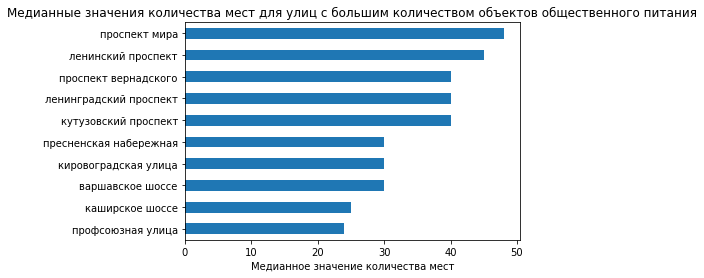

In [45]:
top_10_data.groupby('street')['number'].median().sort_values().plot(kind = 'barh')
plt.title('Медианные значения количества мест для улиц с большим количеством объектов общественного питания')
plt.ylabel(None)
plt.xlabel('Медианное значение количества мест');

In [46]:
top_10_data.groupby('street')['number'].median().sort_values(ascending = False)

street
проспект мира             48
ленинский проспект        45
проспект вернадского      40
ленинградский проспект    40
кутузовский проспект      40
пресненская набережная    30
кировоградская улица      30
варшавское шоссе          30
каширское шоссе           25
профсоюзная улица         24
Name: number, dtype: int64

In [47]:
top_10_data.groupby('street')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
варшавское шоссе,164.0,52.475610,74.530387,0.0,8.0,30.0,64.25,500.0
каширское шоссе,111.0,55.504505,87.962376,0.0,7.0,25.0,77.50,680.0
кировоградская улица,108.0,59.787037,79.480327,0.0,6.0,30.0,65.50,300.0
кутузовский проспект,114.0,85.061404,194.464196,0.0,20.0,40.0,96.00,1700.0
ленинградский проспект,170.0,52.764706,63.361020,0.0,15.0,40.0,70.00,625.0
ленинский проспект,147.0,63.469388,67.969706,0.0,20.0,45.0,80.00,495.0
пресненская набережная,167.0,45.844311,65.316834,0.0,8.5,30.0,50.00,478.0
проспект вернадского,128.0,68.804688,123.295181,0.0,20.0,40.0,80.00,1288.0
проспект мира,203.0,63.004926,58.952615,0.0,20.0,48.0,90.00,326.0


In [48]:
top_10_data.groupby('street')['number'].median().describe()

count    10.000000
mean     35.200000
std       8.430105
min      24.000000
25%      30.000000
50%      35.000000
75%      40.000000
max      48.000000
Name: number, dtype: float64

На Проспекте Мира находятся самые большие заведения по медианному значению количества мест. На Профсоюзной же находятся совсем небольшие заведения: медиана количества мест там составляет 24 места.
Но в целом на улицах с большим количеством объектов общественного питания завдения не очень большие: медианные значения не превышают 48.

Посмотрим на распределение количества посадочных мест на этих улицах:

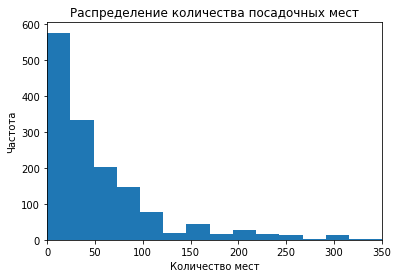

In [52]:
top_10_data['number'].plot(kind = 'hist', xlim = (0, 350), bins=70)
plt.title('Распределение количества посадочных мест')
plt.ylabel('Частота')
plt.xlabel('Количество мест');

Как видим, в большинстве заведений не больше 25 посадочных мест. Ближе к 100-125 частотность понижается.  Интересны небольшие пики на цифрах 150, 200, 300: быть может, это связано с какими-то стандартами по количеству мест. <br>
Вообще для расчета оптимального количества посадочных мест существует различные формулы и стандарты. Из интересного: оказывается  количество мест в ресторане, размещаемом выше 16-го этажа, не должно превышать 100 мест (в соответствии с МГСН 4.04-94, информация с mos.ru). Вот! <br>
Так что тут скорее всего пики связаны с тем, что в помещении стандартная площадь (200, 300, 500 квадратных метров) --> рассчитанное по формуле количество посадочных мест.

###  Общий вывод

Проанализировали данные:
- С большим отрывом по количеству идут кафе - их 6071, что составляет 39.7%. Практически наравне - столовые (2584, 16.9%) и рестораны (2282, 14.9%). На последнем месте - отдел кулинарии в магазине (273, 1.8%).
- Среди сетевых заведений больше всего кафе - 1396 (47.1%), предприятий быстрого обслуживания (788, 26.6%) и ресторанов (543, 18.3%)
- Из расчетов также следует, что предприятия быстрого обслуживания чаще остальных являются сетевыми: среди общего количества 41.5% являются сетевыми. На втором месте - отделы кулинарии в магазинах (но это, скорее всего, связано с сетевым типом магазинов, здесь 28.5%) На третьем же месте - рестораны с 23%. Реже остальных - столовые, там нет и 1% сетевого типа заведений: 0.11%.
- В 90% сетей не более 120 посадочных мести и не более 8 заведений. То есть можно сделать вывод о том, что для сетевых заведений характерно небольшое количество заведений с большим количеством мест.
- Больше всего посадочных мест в столовых (в среднем - 130), далее идут рестораны (96 посадочных мест), на третьем - буфеты. Меньше всего посадочных мест в отделах кулинарии в магазинах (их там в среднем около 5)
- Больше всего заведений общественного питания находится на Проспекте мира, также в тройке лидеров Профсоюзная улица и Ленинградский проспект.
- Количество улиц с одним заведнием общественного питания - 553.
- На Проспекте Мира находятся самые большие заведения по медианному значению количества мест. На Профсоюзной же находятся совсем небольшие заведения: медиана количества мест там составляет 24 места.
Но в целом на улицах с большим количеством объектов общественного питания завдения не очень большие: медианные значения не превышают 48. 
- Также был выделен список районов, в которых есть улицы с самым большим количеством заведений и улицы только с одним заведением. По этим данным можно сделать предположение о том, какой район может быть перспективным в плане открытия нового кафе.



Рекомендации:
- По типу заведения: кафе или ресторан. Среди заведений больше всего (и поэтому предполагаем, что популярнее) кафе, столовые и рестораны. Столовая предполагает чаще всего самообслуживание, и фишка в роботах тут скорее всего не сработает. Также такая тематика может подойти предприятиям быстрого обслуживания: в таких заведениях меню обычно стандартизировано, а вместо официантов - кассиры. 
- По количеству посадочных мест: в 90% случаев в заведениях не больше 120 мест. Так что рекомендуется ориентироваться на это число. Также необходимо понимать, сколько роботов планируется закупить и сколько человек они могут обслужить. И уже из всех этих цифр принимать решение. 
- По району: - был выделен список районов, в которых есть улицы с самым большим количеством заведений и улицы только с одним заведением:
        - Алексеевский район
        - Донской район
        - Мещанский район
        - Нагорный район
        - Обручевский район
        - Останкинский район
        - Пресненский район
        - Район Аэропорт
        - Район Беговой
        - Район Гагаринский
        - Район Дорогомилово
        - Район Коньково
        - Район Марьина роща
        - Район Москворечье-Сабурово
        - Район Раменки
        - Район Ростокино
        - Район Свиблово
        - Район Северное Бутово
        - Район Сокол
        - Район Фили-Давыдково
        - Район Черемушки
        - Район Чертаново Северное
        - Район Чертаново Южное
        - Район Южное Бутово
        - Район Якиманка
        - Район Ясенево
        - Хорошевский район
        - Ярославский Район 
    По этим данным можно сделать предположение о том, какой район может быть перспективным в плане открытия нового кафе: 
    - тут есть улицы и с большим количеством заведений. Будем считать, что это популярные для отдыхающих места, что скорее всего говорит о том, что район хороший: не какая-нибудь промзона с одним-единственным кафе "для-своих". Но и из-за этого здесь слишком высокая конкуренция, арендная плата и тд
    - и улицы, где есть всего одно заведение общественного питания. То есть, есть возможность открыть заведение на не самой популярной улице, но в одном из самых популярных районов. 

### Презентация

Презентация: https://docs.google.com/presentation/d/1-mWPdRXm-tEe3sMiAE1BNVaZF5i1BOgmiPIcIrMDjAo/edit?usp=sharing